#Stock Price Forecasting using ARIMA model
* We used 3 stocks to test our forecasting model- EXX5, IQQE and IUS4.
* Data sets are collected from [Yahoo Finance](https://finance.yahoo.com/)
* Time Window: May 2021 to May 2022

#Importing Libraries

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scs
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from scipy.stats import normaltest
from statsmodels.tsa.stattools import acf,pacf
#from pmdarima.arima import auto_arima
import scipy.interpolate as sci
import scipy.optimize as sco
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import scipy.optimize as sco
import yfinance as yf

#Importing Data Sets

In [216]:
ticker = yf.Ticker("AMZN")
#can do 60 days, find way to get it to today.? .time()??
amzn = ticker.history(start="2025-12-02", end="2026-02-07", interval="1d")
#prepost: Include Pre and Post regular market data in results? (Default is False)- no need usually to change this from False
#auto_adjust: Adjust all OHLC (Open/High/Low/Close prices) automatically? (Default is True)- just leave this always as true and don’t worry about it
#actions: Download stock dividends and stock splits events? (Default is True)
amzn["Return"]=amzn["Close"]-amzn["Open"]
amzn["Pct Return"]=(amzn['Close'] - amzn['Open']) / amzn['Open'] * 100
amzn

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Return,Pct Return
Date,,,,,,,,,
2025-12-02 00:00:00-05:00,235.009995,238.970001,233.550003,234.419998,45785400,0.0,0.0,-0.589996,-0.251052
2025-12-03 00:00:00-05:00,233.350006,233.380005,230.610001,232.380005,35495100,0.0,0.0,-0.970001,-0.415685
2025-12-04 00:00:00-05:00,232.770004,233.500000,226.800003,229.110001,45683200,0.0,0.0,-3.660004,-1.572369
2025-12-05 00:00:00-05:00,230.320007,231.240005,228.550003,229.529999,33117400,0.0,0.0,-0.790009,-0.343005
2025-12-08 00:00:00-05:00,229.589996,230.830002,226.270004,226.889999,35019200,0.0,0.0,-2.699997,-1.176008
2025-12-09 00:00:00-05:00,226.839996,228.570007,225.110001,227.919998,25841700,0.0,0.0,1.080002,0.476107
2025-12-10 00:00:00-05:00,228.809998,232.419998,228.460007,231.779999,38790700,0.0,0.0,2.970001,1.298021
2025-12-11 00:00:00-05:00,230.710007,232.110001,228.690002,230.279999,28249600,0.0,0.0,-0.430008,-0.186385
2025-12-12 00:00:00-05:00,229.869995,230.080002,225.119995,226.190002,35639100,0.0,0.0,-3.679993,-1.600902


#Formatting Data Sets

#Initial Plotting

##Stock price

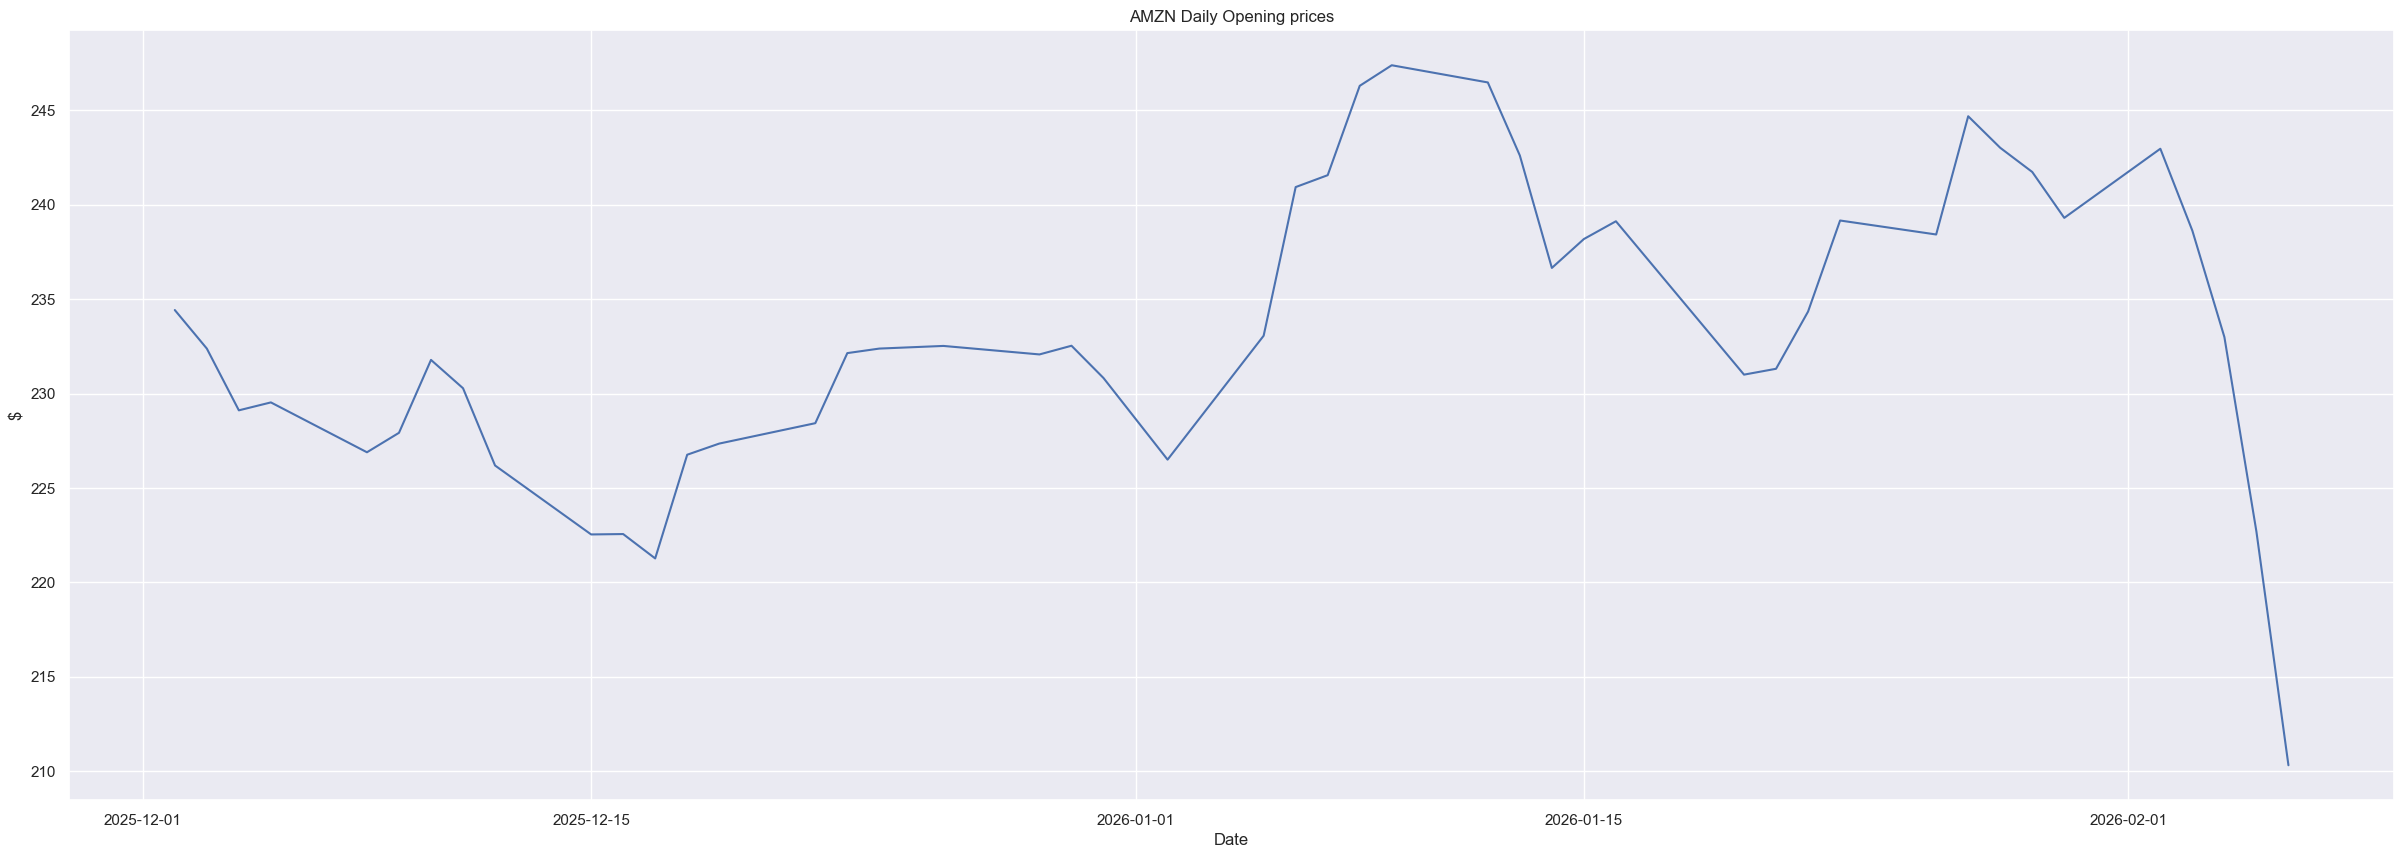

In [217]:
plt.figure(figsize=(30,10))
sns.set_theme(style="darkgrid")
sns.lineplot(data=amzn, x="Date", y="Close")
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('$')
plt.title('AMZN Daily Opening prices')
plt.show()

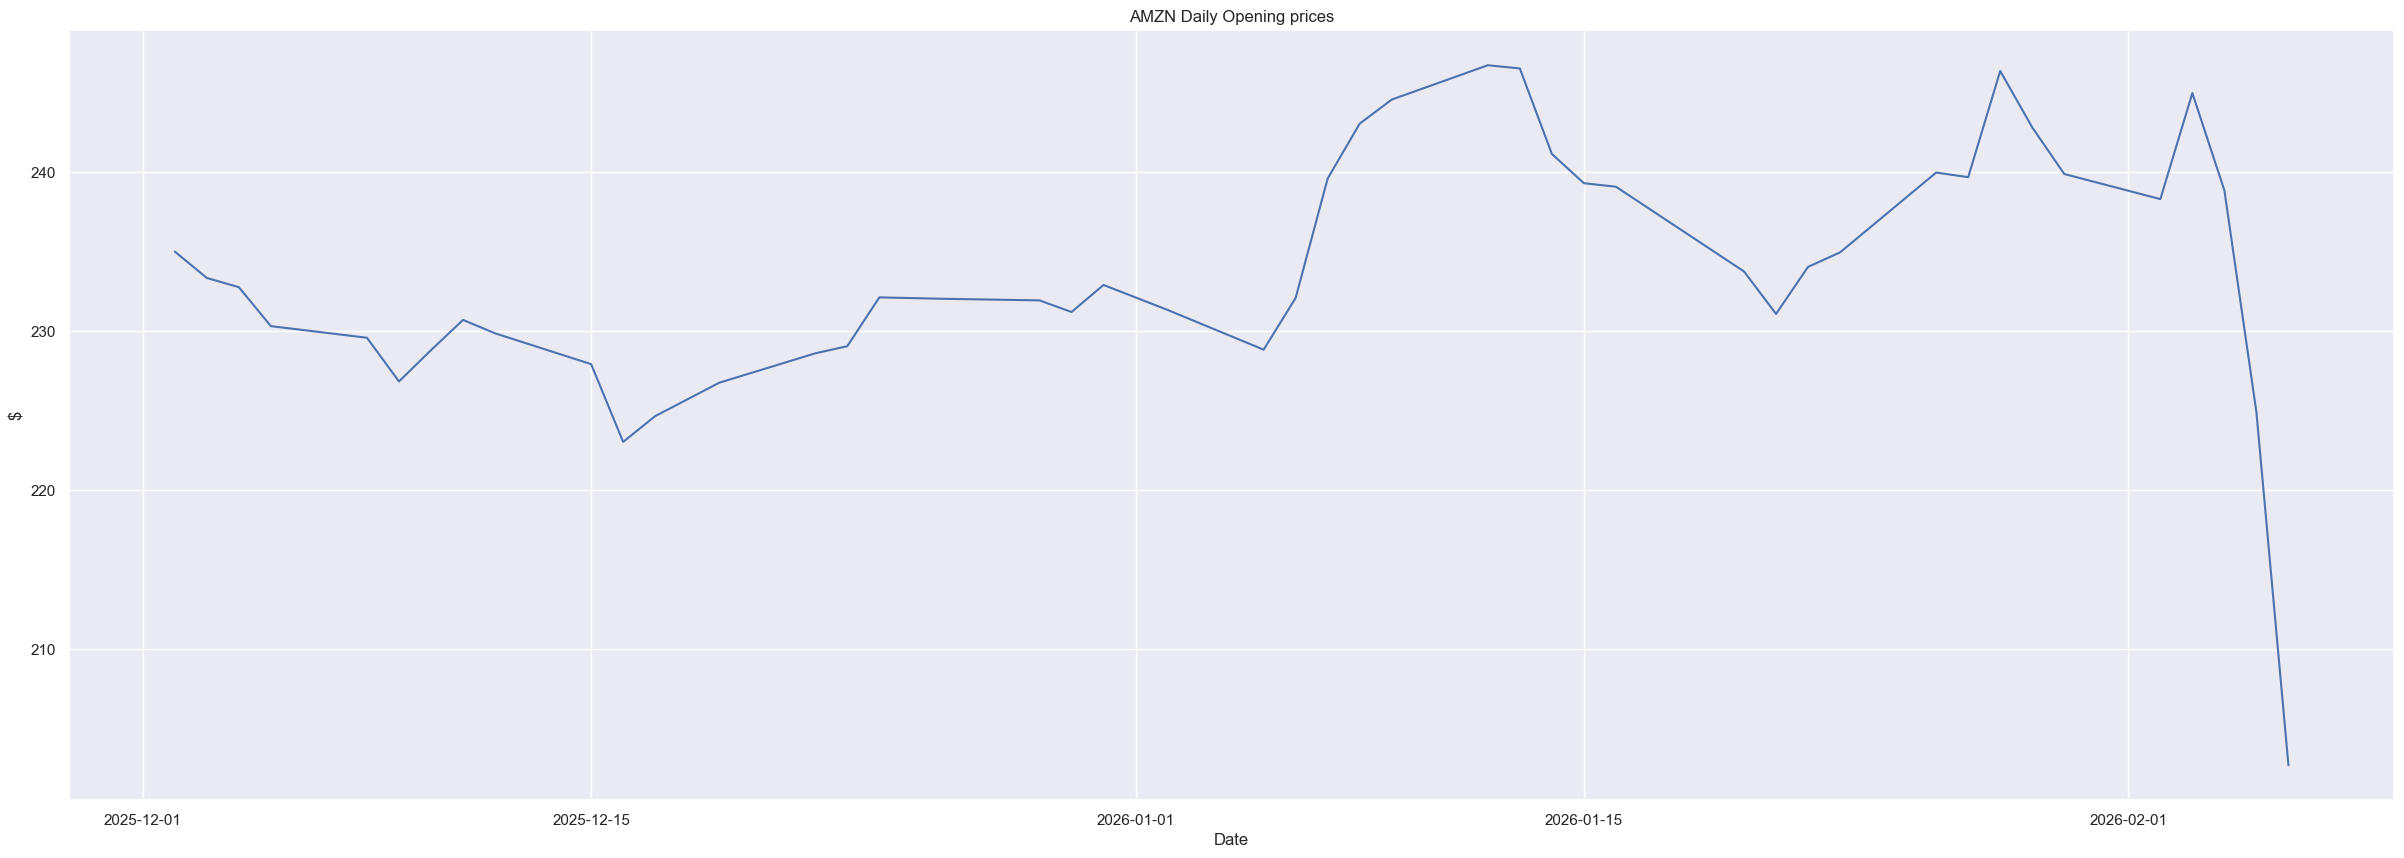

In [218]:
plt.figure(figsize=(30,10))
sns.set_theme(style="darkgrid")
sns.lineplot(data=amzn, x="Date", y="Open")
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('$')
plt.title('AMZN Daily Opening prices')
plt.show()

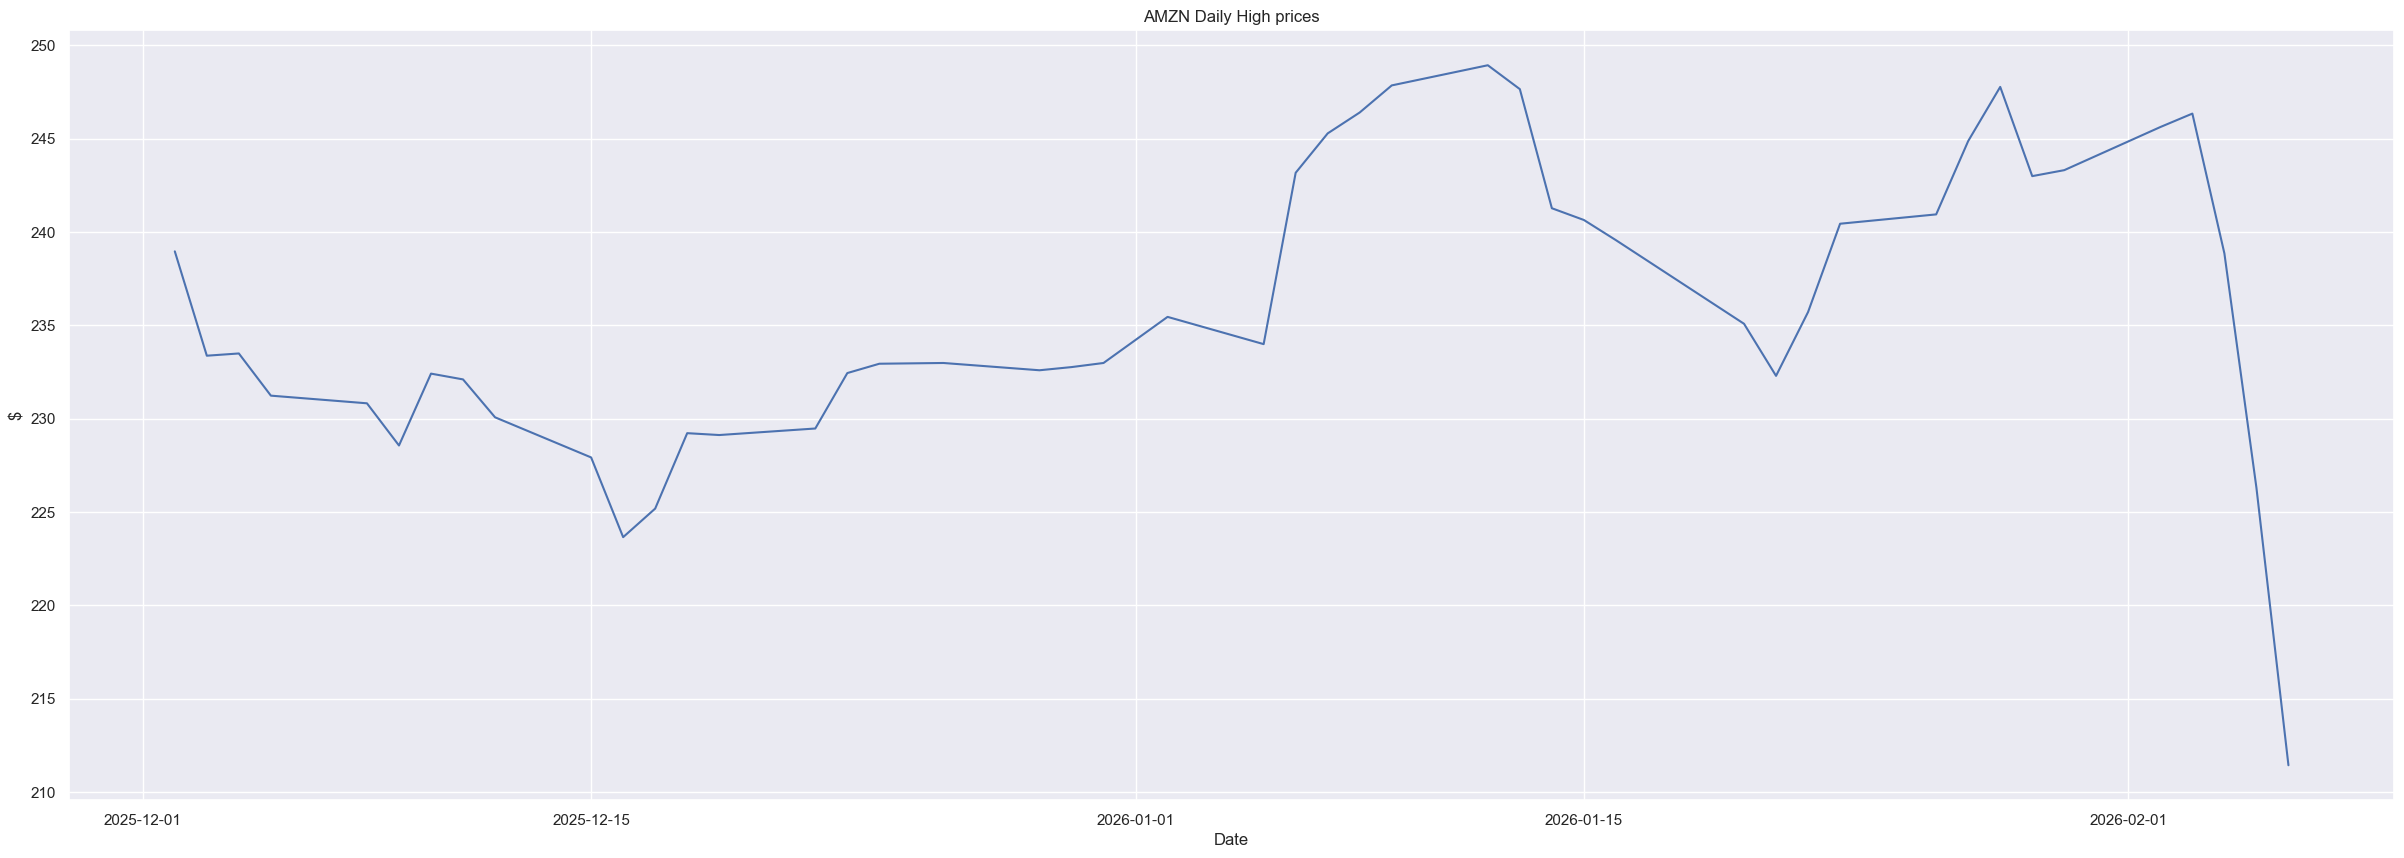

In [219]:
plt.figure(figsize=(30,10))
sns.set_theme(style="darkgrid")
sns.lineplot(data=amzn, x="Date", y="High")
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('$')
plt.title('AMZN Daily High prices')
plt.show()

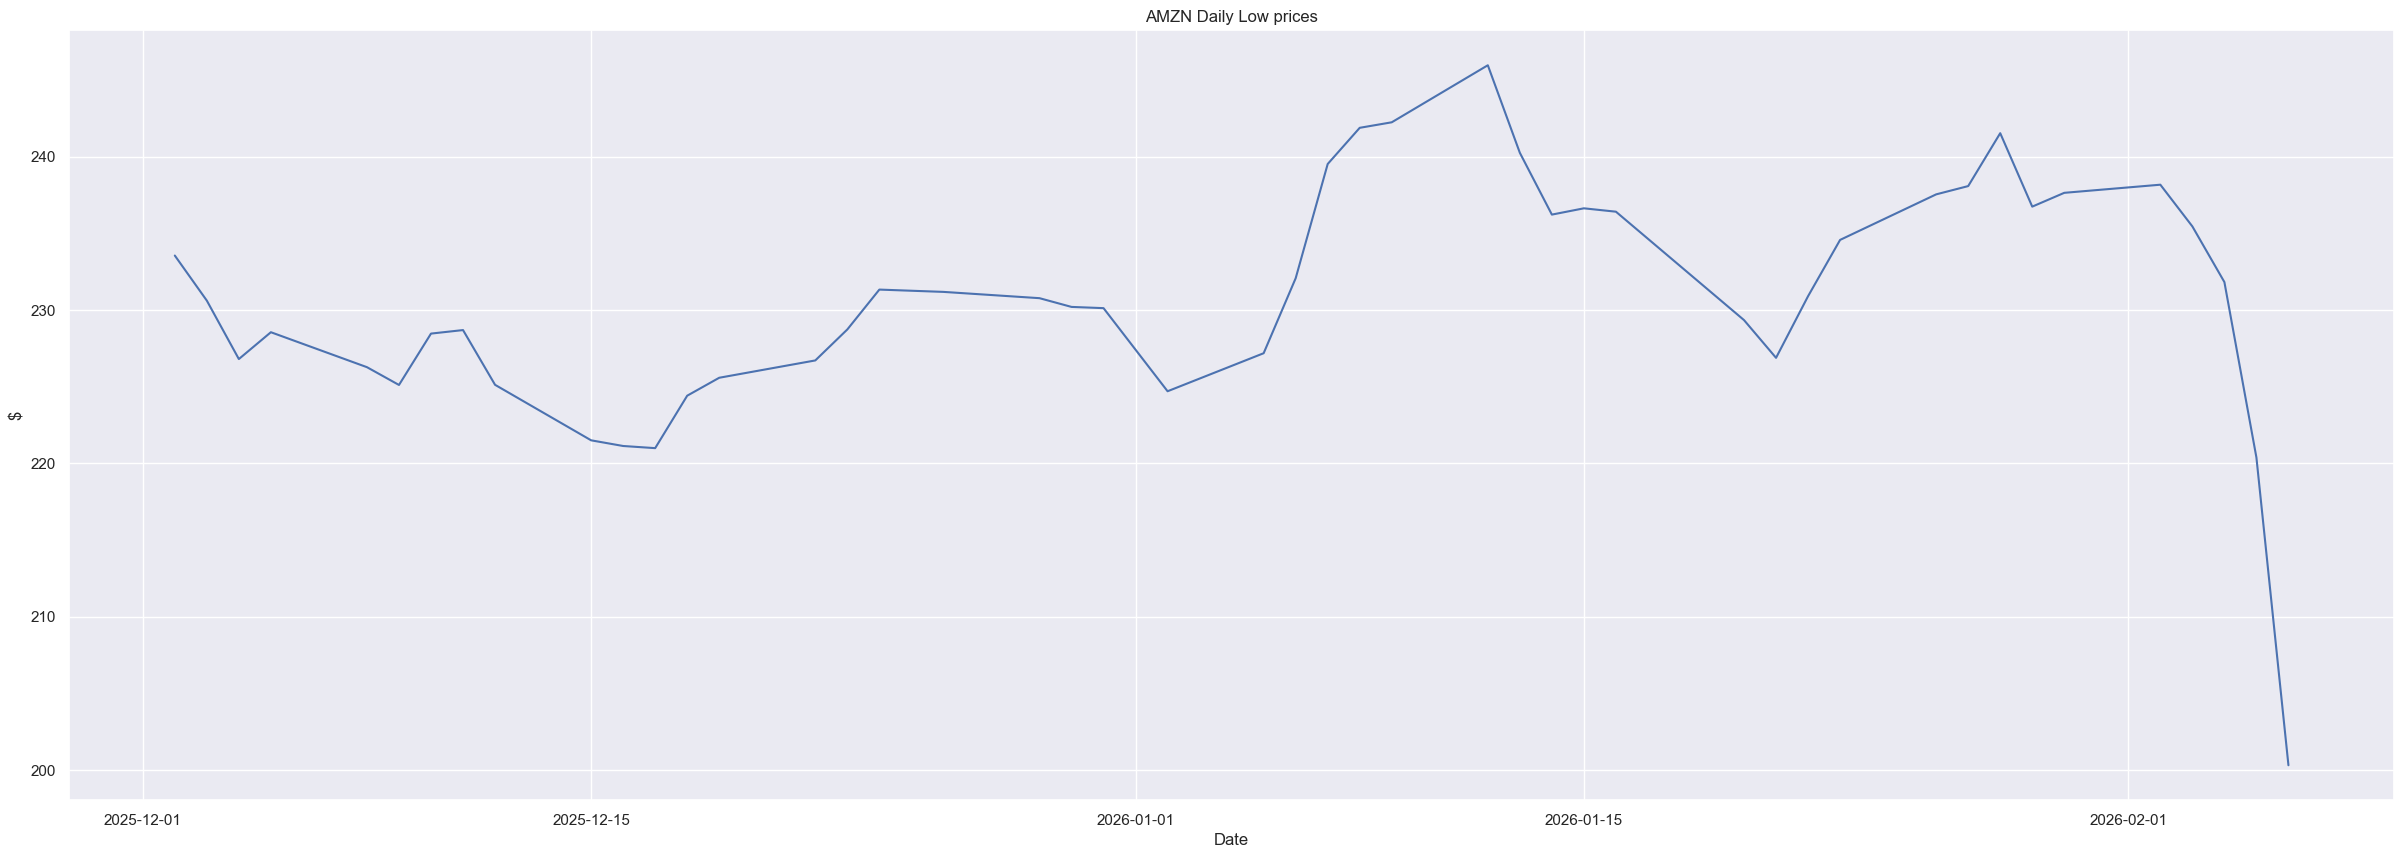

In [220]:
plt.figure(figsize=(30,10))
sns.set_theme(style="darkgrid")
sns.lineplot(data=amzn, x="Date", y="Low")
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('$')
plt.title('AMZN Daily Low prices')
plt.show()

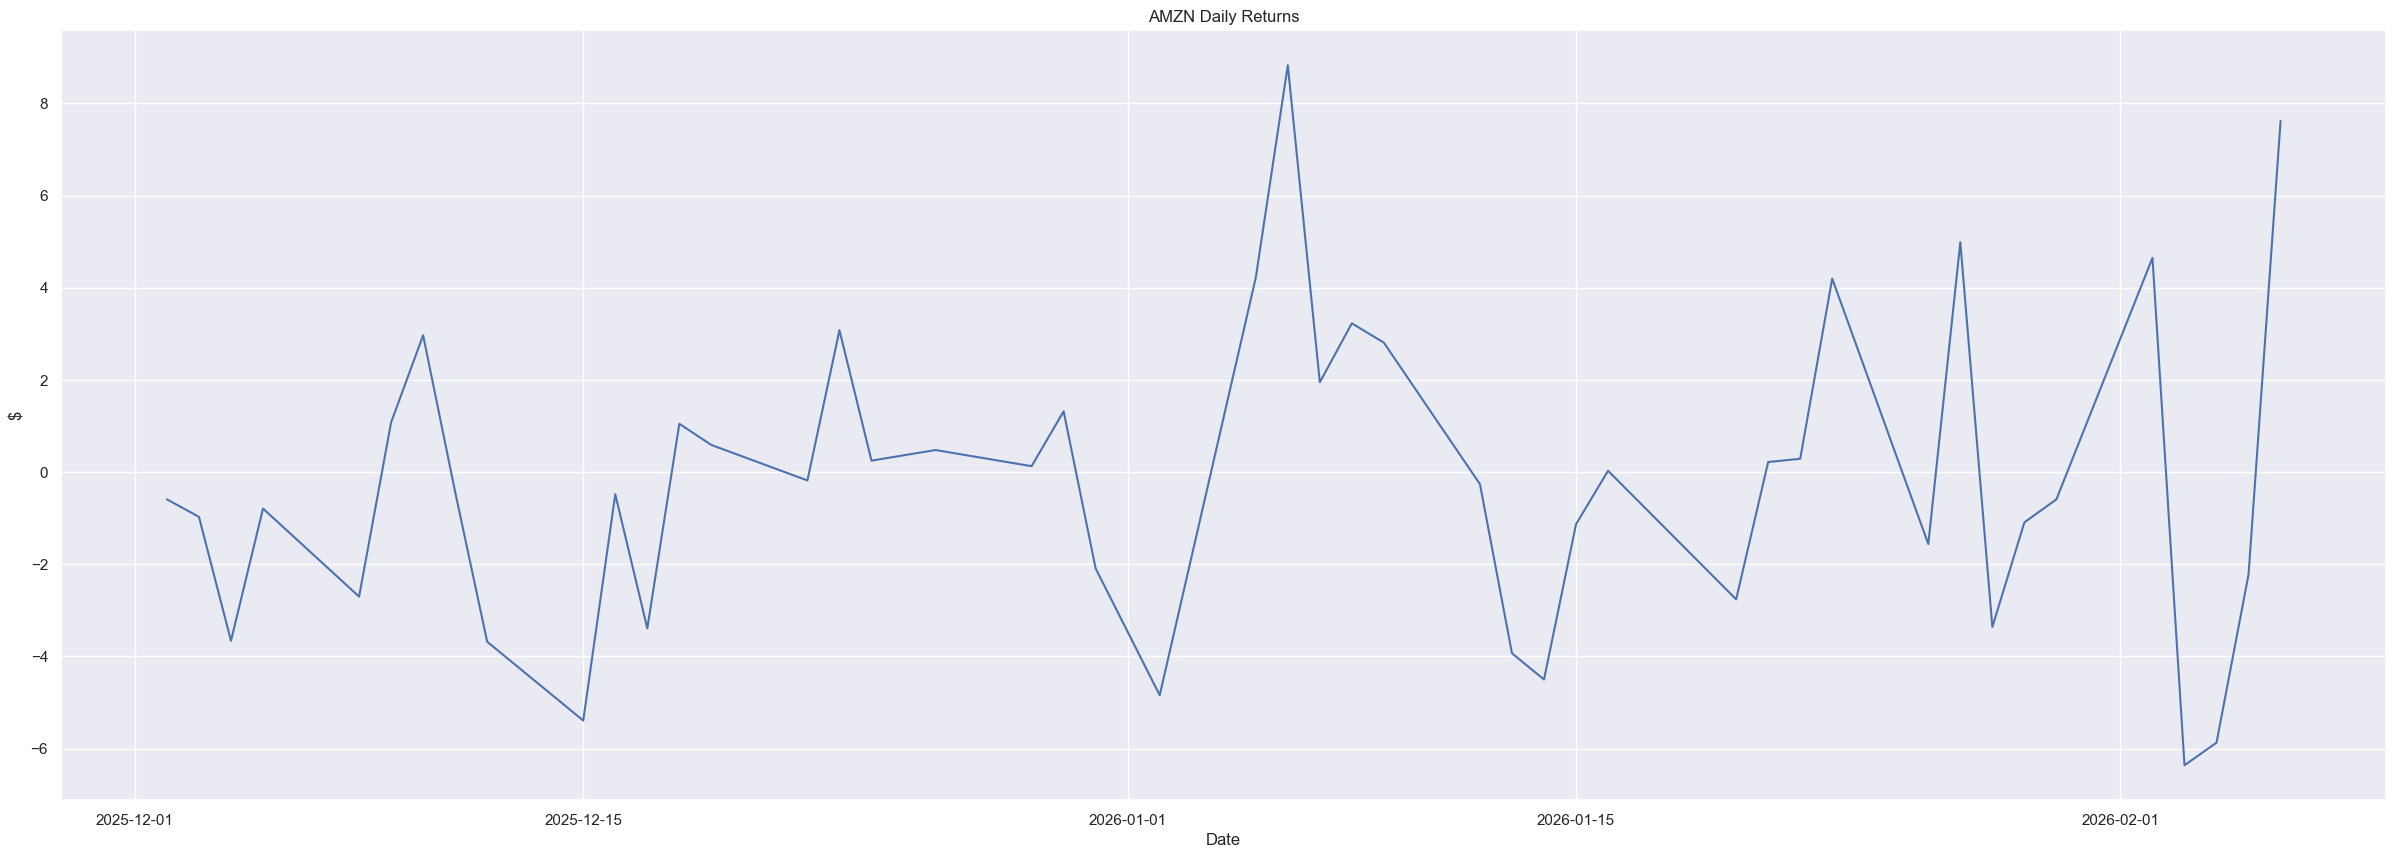

In [221]:
#percent change from open-close
plt.figure(figsize=(30,10))
sns.set_theme(style="darkgrid")
sns.lineplot(data=amzn, x="Date", y="Return")
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('$')
plt.title('AMZN Daily Returns')
plt.show()




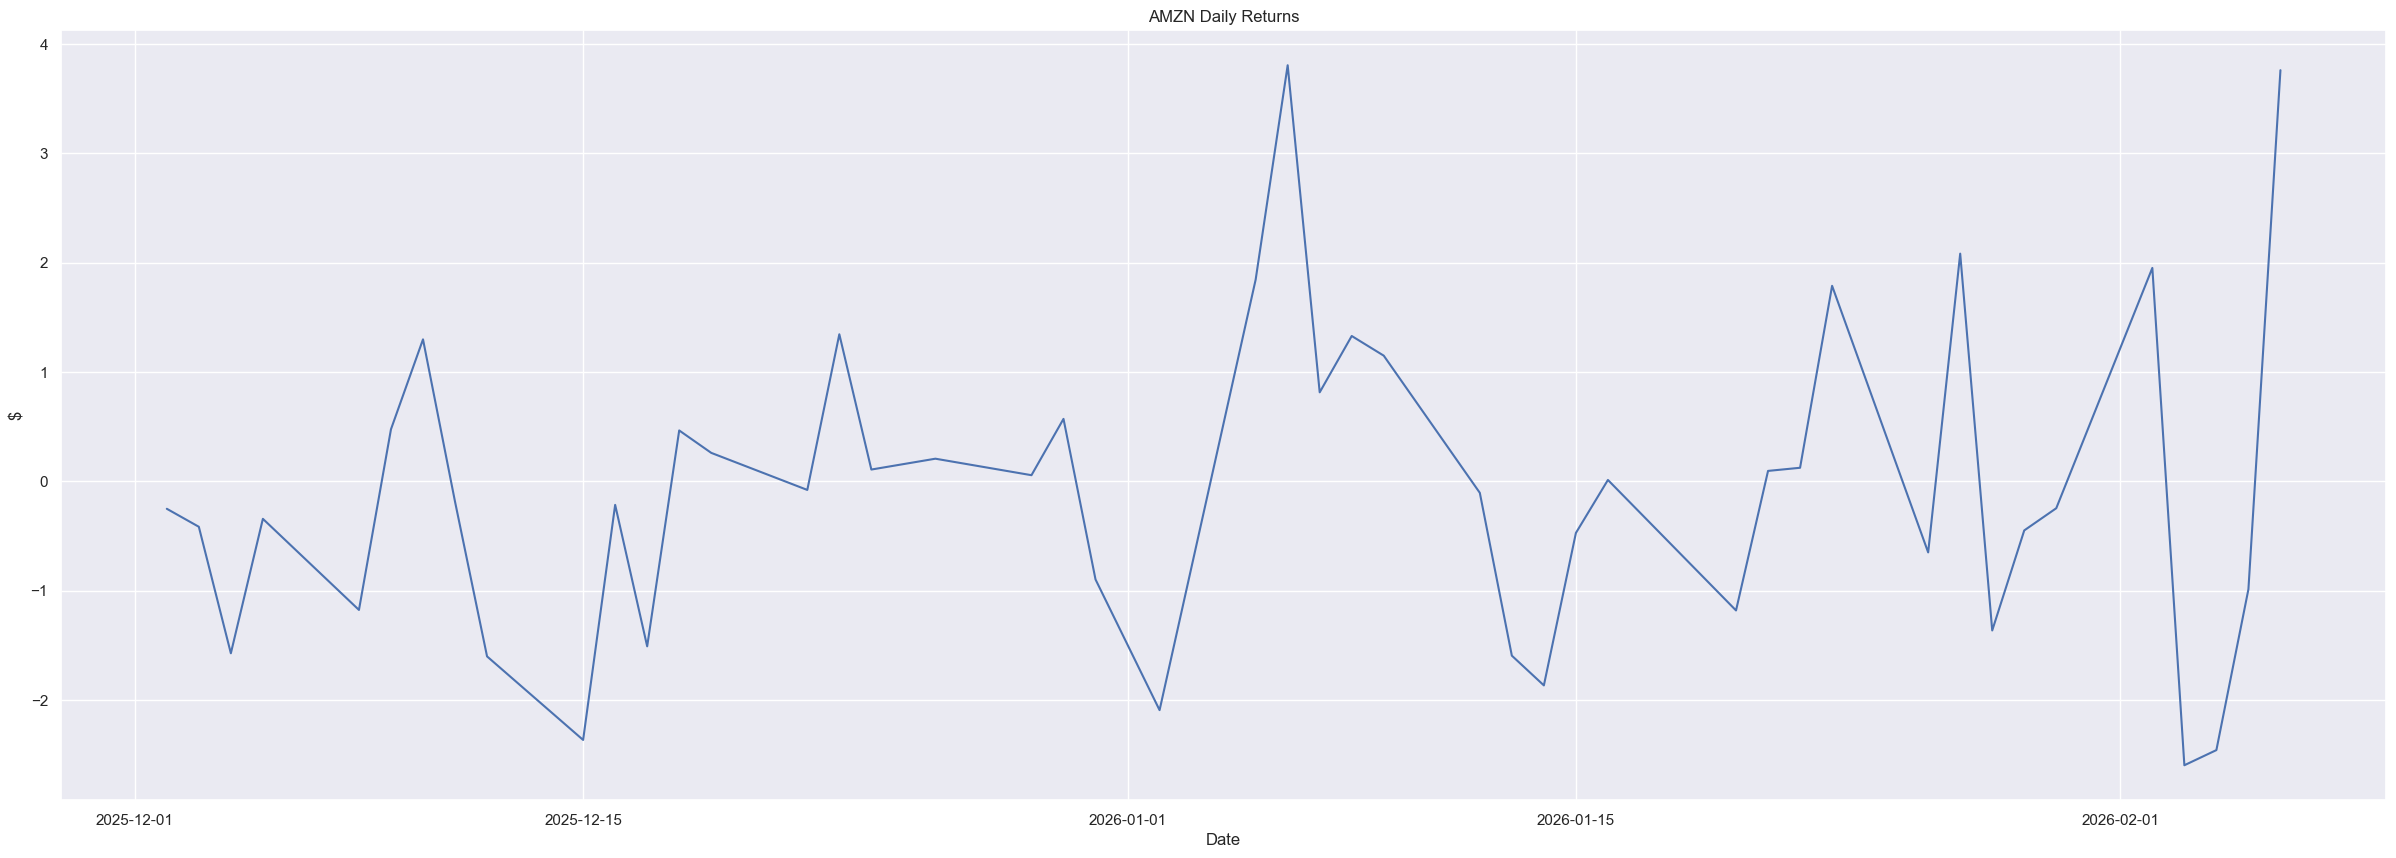

In [222]:
#percent change from open-close
plt.figure(figsize=(30,10))
sns.set_theme(style="darkgrid")
sns.lineplot(data=amzn, x="Date", y="Pct Return")
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('$')
plt.title('AMZN Daily Returns')
plt.show()




##Seasonal Decomposition

In [223]:
'''
result = seasonal_decompose(amzn, model='multiplicative', freq=30)
fig = plt.figure()
fig = result.plot()
plt.title(i)
fig.set_size_inches(12, 8)
plt.show()
'''

"\nresult = seasonal_decompose(amzn, model='multiplicative', freq=30)\nfig = plt.figure()\nfig = result.plot()\nplt.title(i)\nfig.set_size_inches(12, 8)\nplt.show()\n"

We observed trend and seasonality in our data.

#Checking close price data for normality and stationarity
* ADF test
* Normality Test

##ADF test
Augmented Dickey Fuller(ADF) test is a common statistical test used to test whether a given Time series is stationary or not.

In [224]:
#diff versions of data
close=amzn['Close']
price_raw=close
returns = close.pct_change().dropna()
log_returns=np.log(close/close.shift(1)).dropna()


In [225]:
def perform_adf_test(series, title):
    print(f'--- ADF Test for {title} ---')
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    if result[1] <= 0.05:
        print("Result: Stationary (Reject Null Hypothesis) ✅")
    else:
        print("Result: Non-Stationary (Fail to Reject Null) ❌")
    print('\n')

In [226]:
#run tests
perform_adf_test(price_raw, "Raw Close Price")
perform_adf_test(returns, "Daily Returns")
perform_adf_test(log_returns, "Log Returns")

--- ADF Test for Raw Close Price ---
ADF Statistic: -1.5636
p-value: 0.5018
Result: Non-Stationary (Fail to Reject Null) ❌


--- ADF Test for Daily Returns ---
ADF Statistic: -3.6872
p-value: 0.0043
Result: Stationary (Reject Null Hypothesis) ✅


--- ADF Test for Log Returns ---
ADF Statistic: -3.6199
p-value: 0.0054
Result: Stationary (Reject Null Hypothesis) ✅




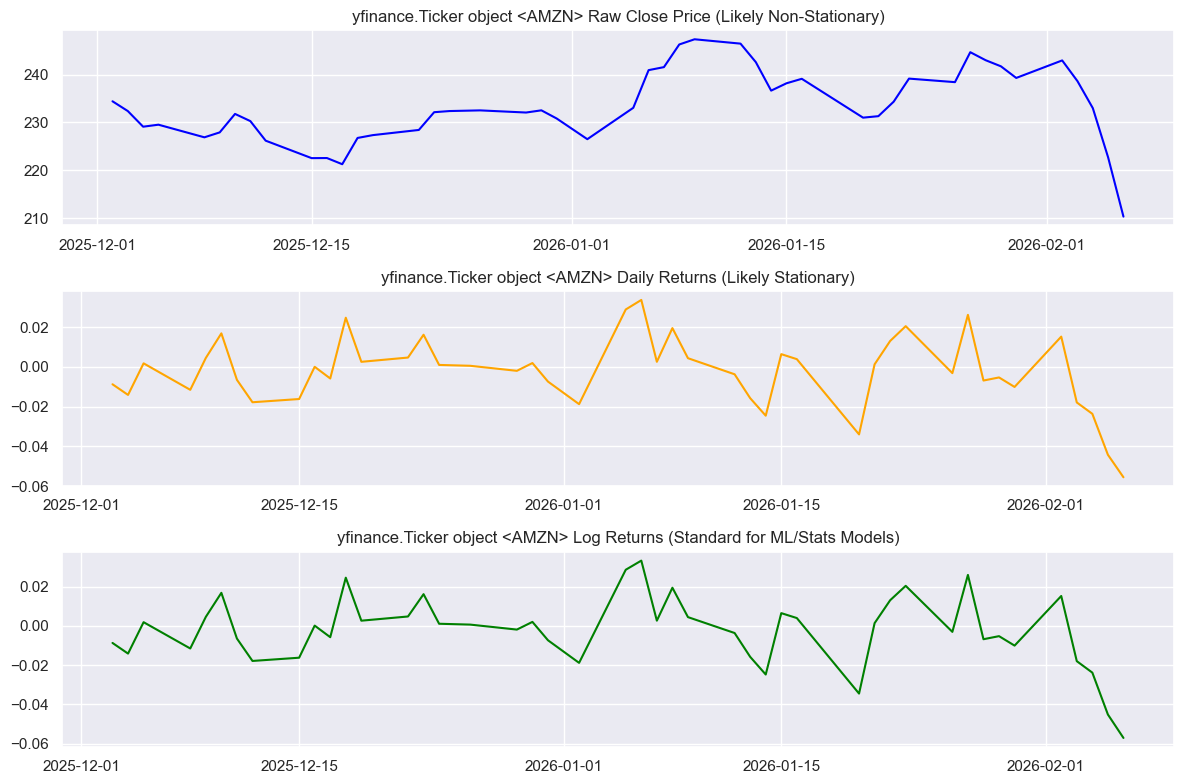

In [227]:
# 4. Visualization
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(price_raw, color='blue')
plt.title(f'{ticker} Raw Close Price (Likely Non-Stationary)')

plt.subplot(3, 1, 2)
plt.plot(returns, color='orange')
plt.title(f'{ticker} Daily Returns (Likely Stationary)')

plt.subplot(3, 1, 3)
plt.plot(log_returns, color='green')
plt.title(f'{ticker} Log Returns (Standard for ML/Stats Models)')

plt.tight_layout()
plt.show()

##Normality Test

In [228]:
'''
stat, p = normaltest(amzn)
print('Statistics=%.3f, p=%.3f' % (stat, p))
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
alpha = 0.05
if p > alpha:
    print('Data is normally distributed (fail to reject H0)')
else:
    print('Data is not normally distributed(reject H0)')
print('\n')
'''

"\nstat, p = normaltest(amzn)\nprint('Statistics=%.3f, p=%.3f' % (stat, p))\nprint('Critical Values:')\nfor key, value in result[4].items():\n    print('\t%s: %.3f' % (key, value))\nalpha = 0.05\nif p > alpha:\n    print('Data is normally distributed (fail to reject H0)')\nelse:\n    print('Data is not normally distributed(reject H0)')\nprint('\n')\n"

#log Transformation
The log transformation can be used to make highly skewed distributions less skewed.

In [229]:
#df_log = np.log(df / df.shift(1))

In [230]:
#df_log.head()

In [231]:
#df_log.hist(bins=50, figsize=(10, 8))
plt.show()

In [232]:
#df_log2 = df_log.dropna()

In [233]:
#df_log2.head()

#Using the log transformed data to do ADF and Normality test


##ADF test

In [234]:
'''
for i in symbols:
  print([i])
  result = adfuller(df_log2[i], autolag='AIC')
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('Critical Values:')
  for key, value in result[4].items():
      print('\t%s: %.3f' % (key, value))
  if result[0] < result[4]["5%"]:
      print ("Reject Null Hypothesis. So, Time Series is Stationary")
  else:
      print ("Failed to reject Null Hypothesis. So, Time Series is Non-Stationary")
  print("\n")
'''

'\nfor i in symbols:\n  print([i])\n  result = adfuller(df_log2[i], autolag=\'AIC\')\n  print(\'ADF Statistic: %f\' % result[0])\n  print(\'p-value: %f\' % result[1])\n  print(\'Critical Values:\')\n  for key, value in result[4].items():\n      print(\'\t%s: %.3f\' % (key, value))\n  if result[0] < result[4]["5%"]:\n      print ("Reject Null Hypothesis. So, Time Series is Stationary")\n  else:\n      print ("Failed to reject Null Hypothesis. So, Time Series is Non-Stationary")\n  print("\n")\n'

##Normality Test

In [235]:
'''
for i in symbols:
    print([i])
    stat, p = normaltest(df_log2[i])
    print('Test Statistics=%.3f, p=%.3f' % (stat, p))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    alpha = 0.05
    if p > alpha:
        print('Data is normally distributed (fail to reject H0)')
    else:
        print('Data is not normally distributed(reject H0)')
    print('\n')
'''

"\nfor i in symbols:\n    print([i])\n    stat, p = normaltest(df_log2[i])\n    print('Test Statistics=%.3f, p=%.3f' % (stat, p))\n    print('Critical Values:')\n    for key, value in result[4].items():\n        print('\t%s: %.3f' % (key, value))\n    alpha = 0.05\n    if p > alpha:\n        print('Data is normally distributed (fail to reject H0)')\n    else:\n        print('Data is not normally distributed(reject H0)')\n    print('\n')\n"

We can see that now the data for all three stocks is stationary. But, even if IUS4 is normally distributed, the other two are not. Have to look into why this is happening.

###QQ plot
Quantile-Quantile Plot

In [236]:
'''
fig = sm.qqplot(df_log2['EXX5'], line='s')
plt.show()
'''

"\nfig = sm.qqplot(df_log2['EXX5'], line='s')\nplt.show()\n"

In [237]:
'''
fig = sm.qqplot(df_log2['IQQE'], line='s')
plt.show()
'''

"\nfig = sm.qqplot(df_log2['IQQE'], line='s')\nplt.show()\n"

In [238]:
'''
fig = sm.qqplot(df_log2['IUS4'], line='s')
plt.show()
'''

"\nfig = sm.qqplot(df_log2['IUS4'], line='s')\nplt.show()\n"

For EXX5 and IQQE, We can see that most of the points lie mostly along the straight diagonal line with some minor deviations along each of the tails.

Based on this plot, we could assume that set of data for EXX5 and IQQE is normally distributed.

#Constructing an ARIMA model with auto-fitting parameters (p,d,q)

In [239]:
!pip install pmdarima

  Using cached pmdarima-2.1.1-cp313-cp313-win_amd64.whl.metadata (8.5 kB)
   ---------------------------------------- 0.0/711.9 kB ? eta -:--:--
   ---------------------------- ---------- 524.3/711.9 kB 13.1 MB/s eta 0:00:01
   ---------------------------------------- 711.9/711.9 kB 7.2 MB/s  0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 2.8/2.8 MB 14.7 MB/s  0:00:00

   ---------------------------------------- 0/2 [Cython]
   ---------------------------------------- 0/2 [Cython]
   ---------------------------------------- 0/2 [Cython]
   ---------------------------------------- 0/2 [Cython]
   ---------------------------------------- 0/2 [Cython]
   ---------------------------------------- 0/2 [Cython]
   ---------------------------------------- 0/2 [Cython]
   ---------------------------------------- 0/2 [Cython]
   ---------------------------------------- 0/2 [Cython]
   --------------------------------------

In [240]:
from pmdarima import auto_arima

In [249]:
df = amzn['Close']
def arima_auto(arr):
    train_data=pd.DataFrame() # splitting into test and train data
    test_data=pd.DataFrame() 
    plt.figure(figsize=(12,8))
    train_data, test_data = df[1:int(len(df)*0.8)], df[int(len(df)*0.8):]
    model = auto_arima(train_data, trace=True, error_action='ignore', suppress_warnings=True)
    model.fit(train_data) # fitting the model

    forecast = model.predict(n_periods=len(test_data))
    forecast = pd.DataFrame(forecast,index = test_data.index) # plot the predictions for validation set
    plt.plot(train_data, label='Train')
    plt.plot(test_data, label='Test')
    plt.plot(forecast, label='Prediction')
    plt.title('Stocks Price Prediction\n')
    plt.xlabel('Date')
    plt.ylabel('Actual Stock Price')
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
#    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=185.611, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=186.237, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=185.473, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=183.722, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.748 seconds


C:\Users\17gil\IdeaProjects\Stock-Price-Forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\17gil\IdeaProjects\Stock-Price-Forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


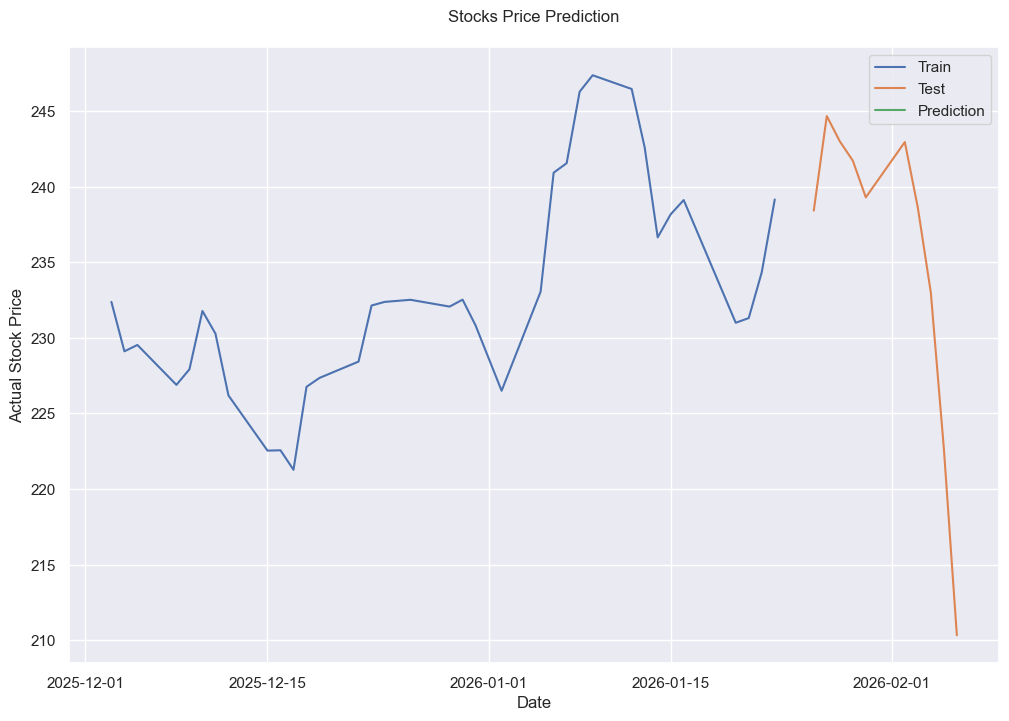

In [250]:
arima_auto(df)

Best fit ARIMA (p,d,q) parameters:
* EXX5 : (1,1,1)
* IQQE : (0,1,0)
* IUS4 : (1,1,1)